In [1]:
import pandas as pd
import duckdb
import os
import missingno as msno

In [2]:
def importCsv(file_name):
    df = pd.read_csv(f'data/{file_name}.csv')
    return df


In [3]:
application_train = importCsv('application_train')
bureau = importCsv('bureau')
previous_application = importCsv("previous_application")

In [4]:
application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [6]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
colonnes_df1 = set(bureau.columns)
colonnes_df2 = set(application_train.columns)

colonnes_identiques = colonnes_df1.intersection(colonnes_df2)

# Convertissez l'ensemble en liste si nécessaire
colonnes_identiques_liste = list(colonnes_identiques)
print("Colonnes identiques :", colonnes_identiques_liste)

Colonnes identiques : ['SK_ID_CURR', 'AMT_ANNUITY']


In [8]:
print(bureau.duplicated().sum())
print(application_train.duplicated().sum())

0
0


<Axes: >

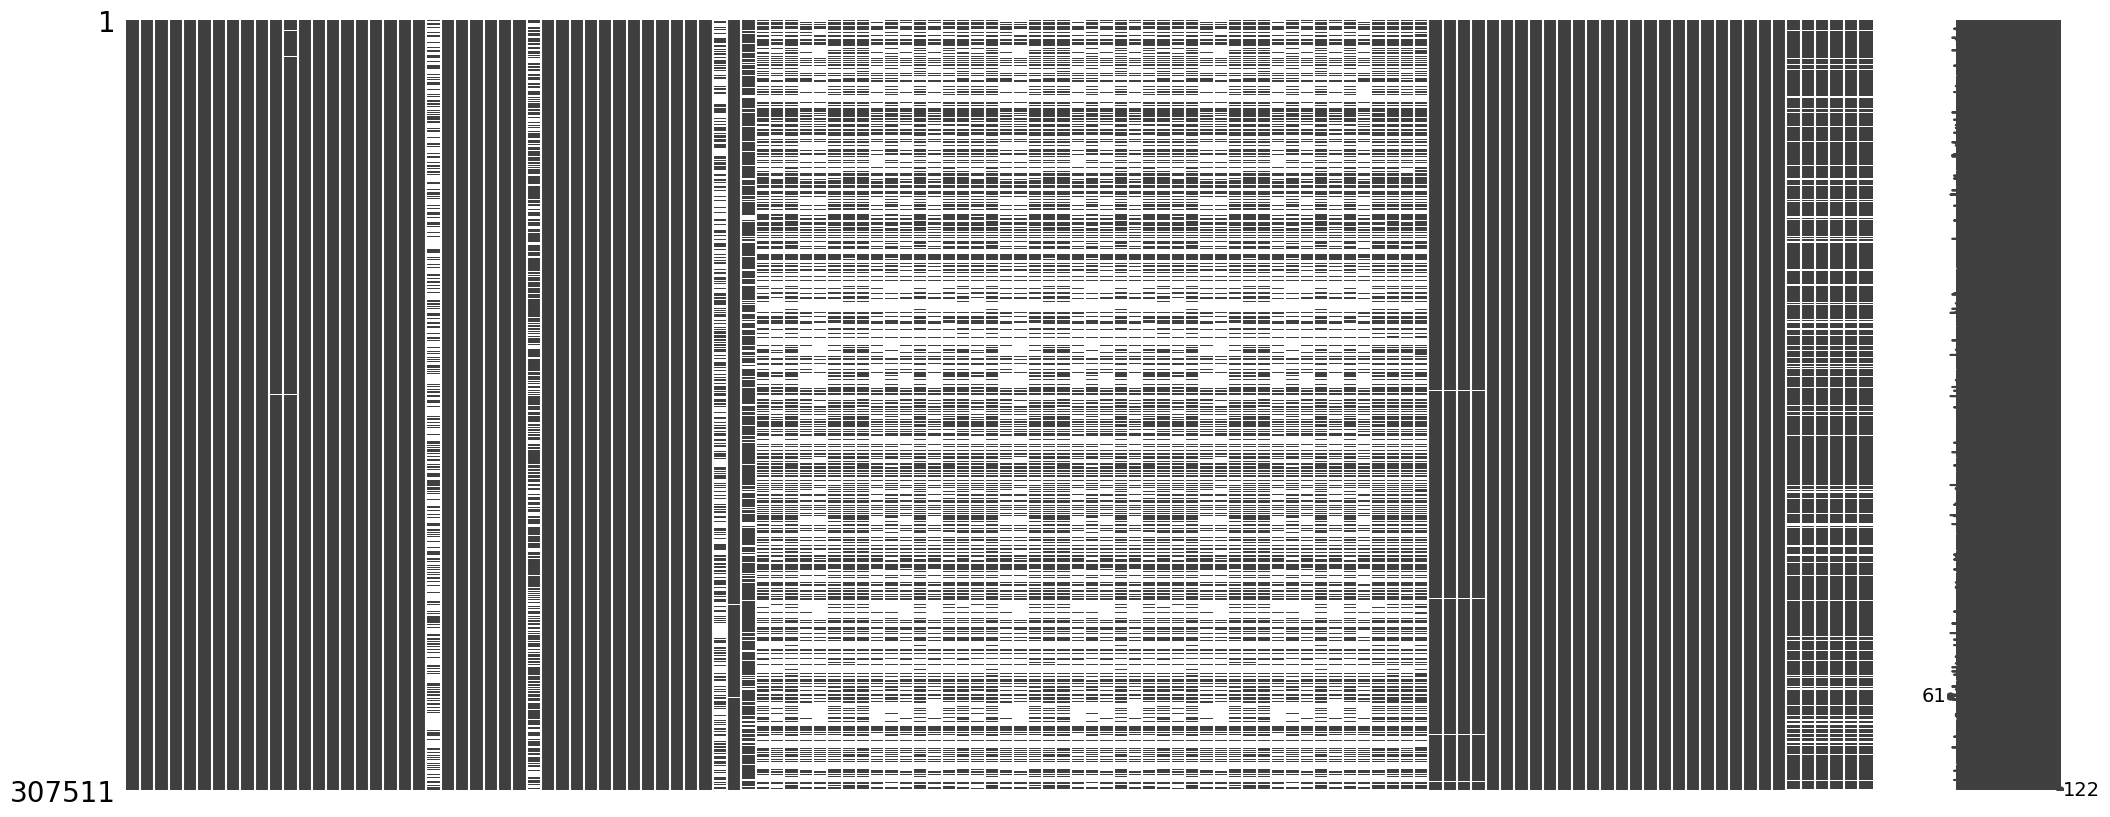

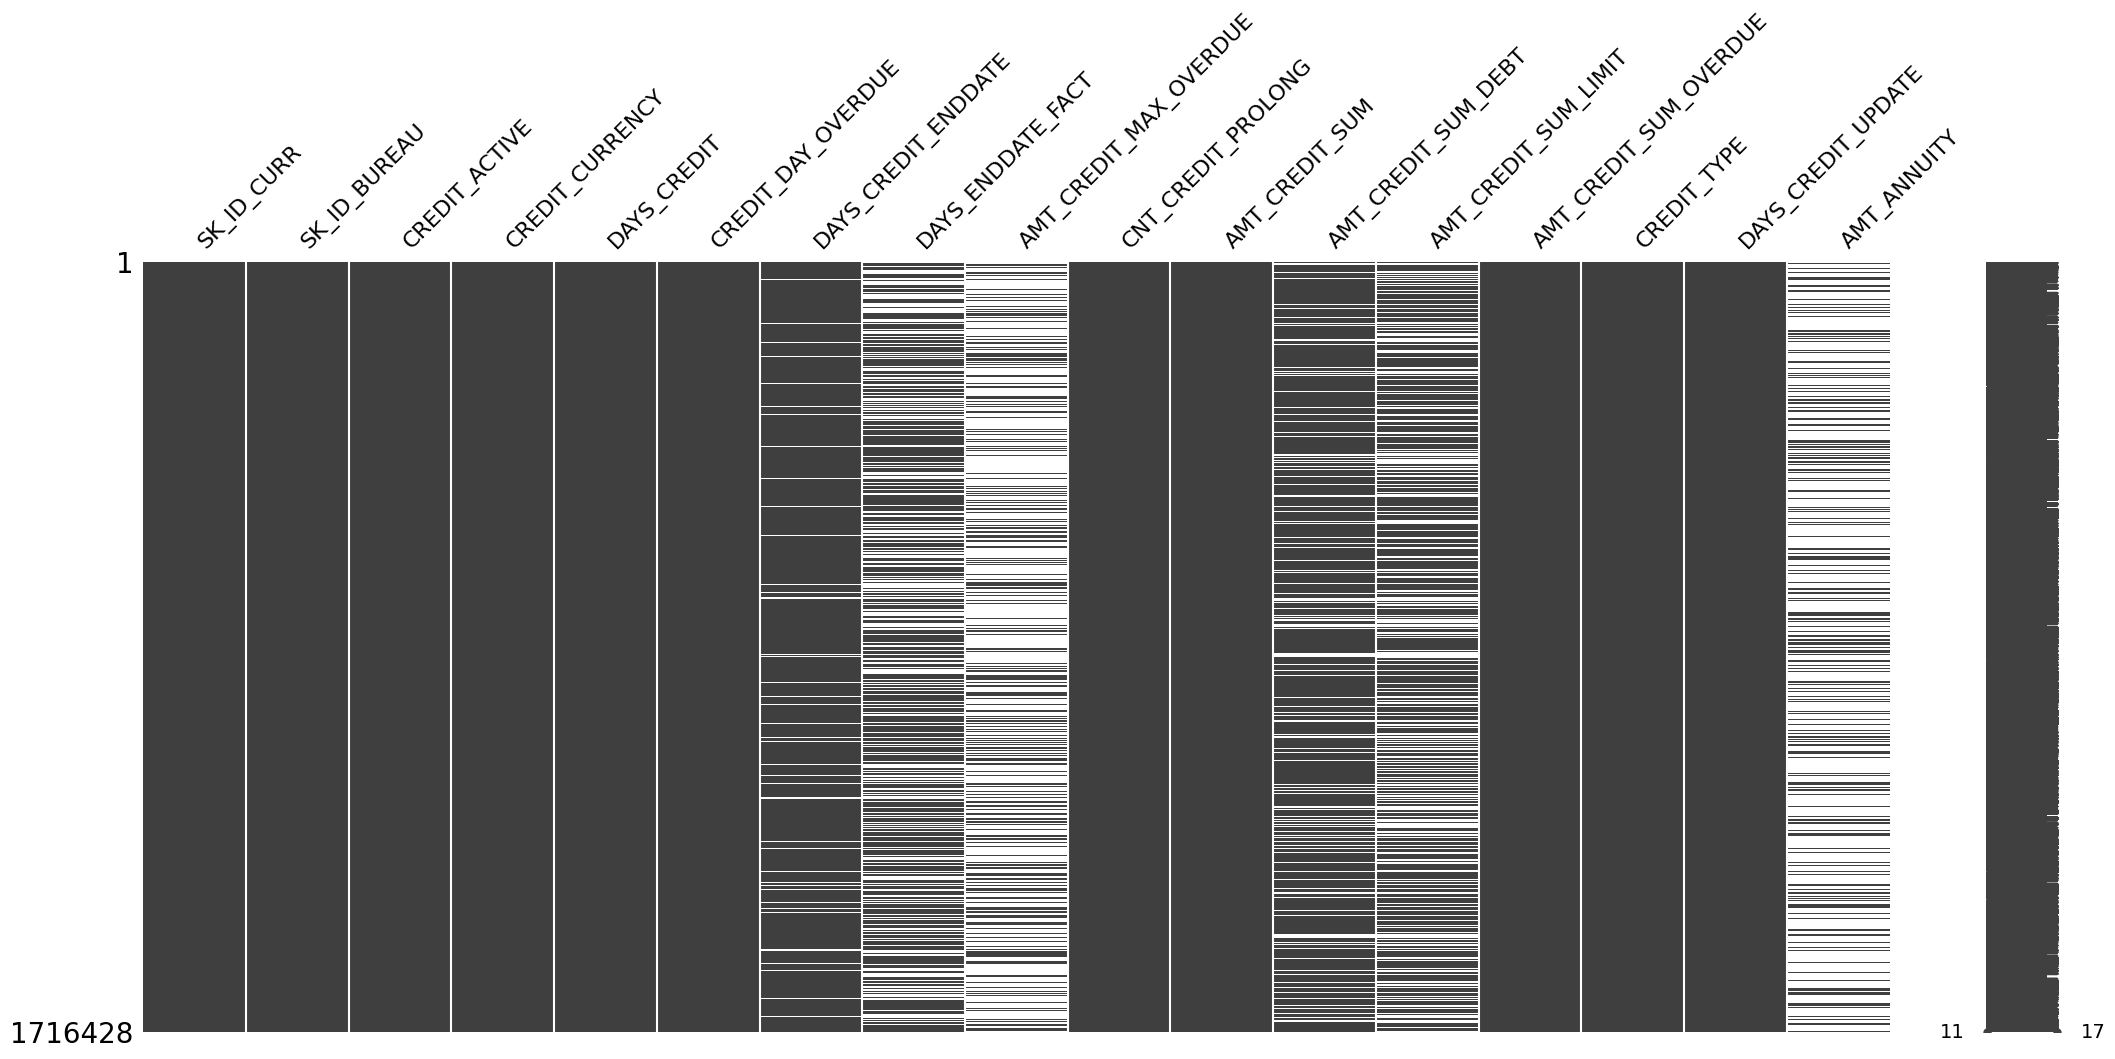

In [9]:
msno.matrix(application_train)
msno.matrix(bureau)

In [10]:
def nettoyageCol(df,seuil):

    nb_valeurs_manquantes = df.isnull().sum()
    proportion_valeurs_manquantes = nb_valeurs_manquantes / len(df)
    colonnes_a_supprimer = proportion_valeurs_manquantes[proportion_valeurs_manquantes > seuil].index
    df_sans_colonnes_manquantes = df.drop(columns=colonnes_a_supprimer)

    return df_sans_colonnes_manquantes

In [11]:
short_application_train = nettoyageCol(application_train,0.5)
short_bureau = nettoyageCol(bureau,0.5)

In [12]:
short_bureau.SK_ID_CURR.duplicated().sum()

1410617

In [13]:
# jointure de 3 dataset
previous_application = pd.read_csv("data/previous_application.csv")

In [16]:
bigDF = application_train.merge(bureau, on='SK_ID_CURR', how='inner').merge(previous_application, on='SK_ID_CURR', how='inner')

In [ ]:
def colCommunes(df1:pd.DataFrame,df2:pd.DataFrame)->pd.DataFrame:
    colonnes_df1 = set(previous_application.columns)
    colonnes_df2 = set(application_train.columns)

    colonnes_identiques = colonnes_df1.intersection(colonnes_df2)

    # Convertissez l'ensemble en liste si nécessaire
    colonnes_identiques_liste = list(colonnes_identiques)
    print("Colonnes identiques :", colonnes_identiques_liste)

Colonnes identiques : ['HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'SK_ID_CURR', 'NAME_TYPE_SUITE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']


<Axes: >

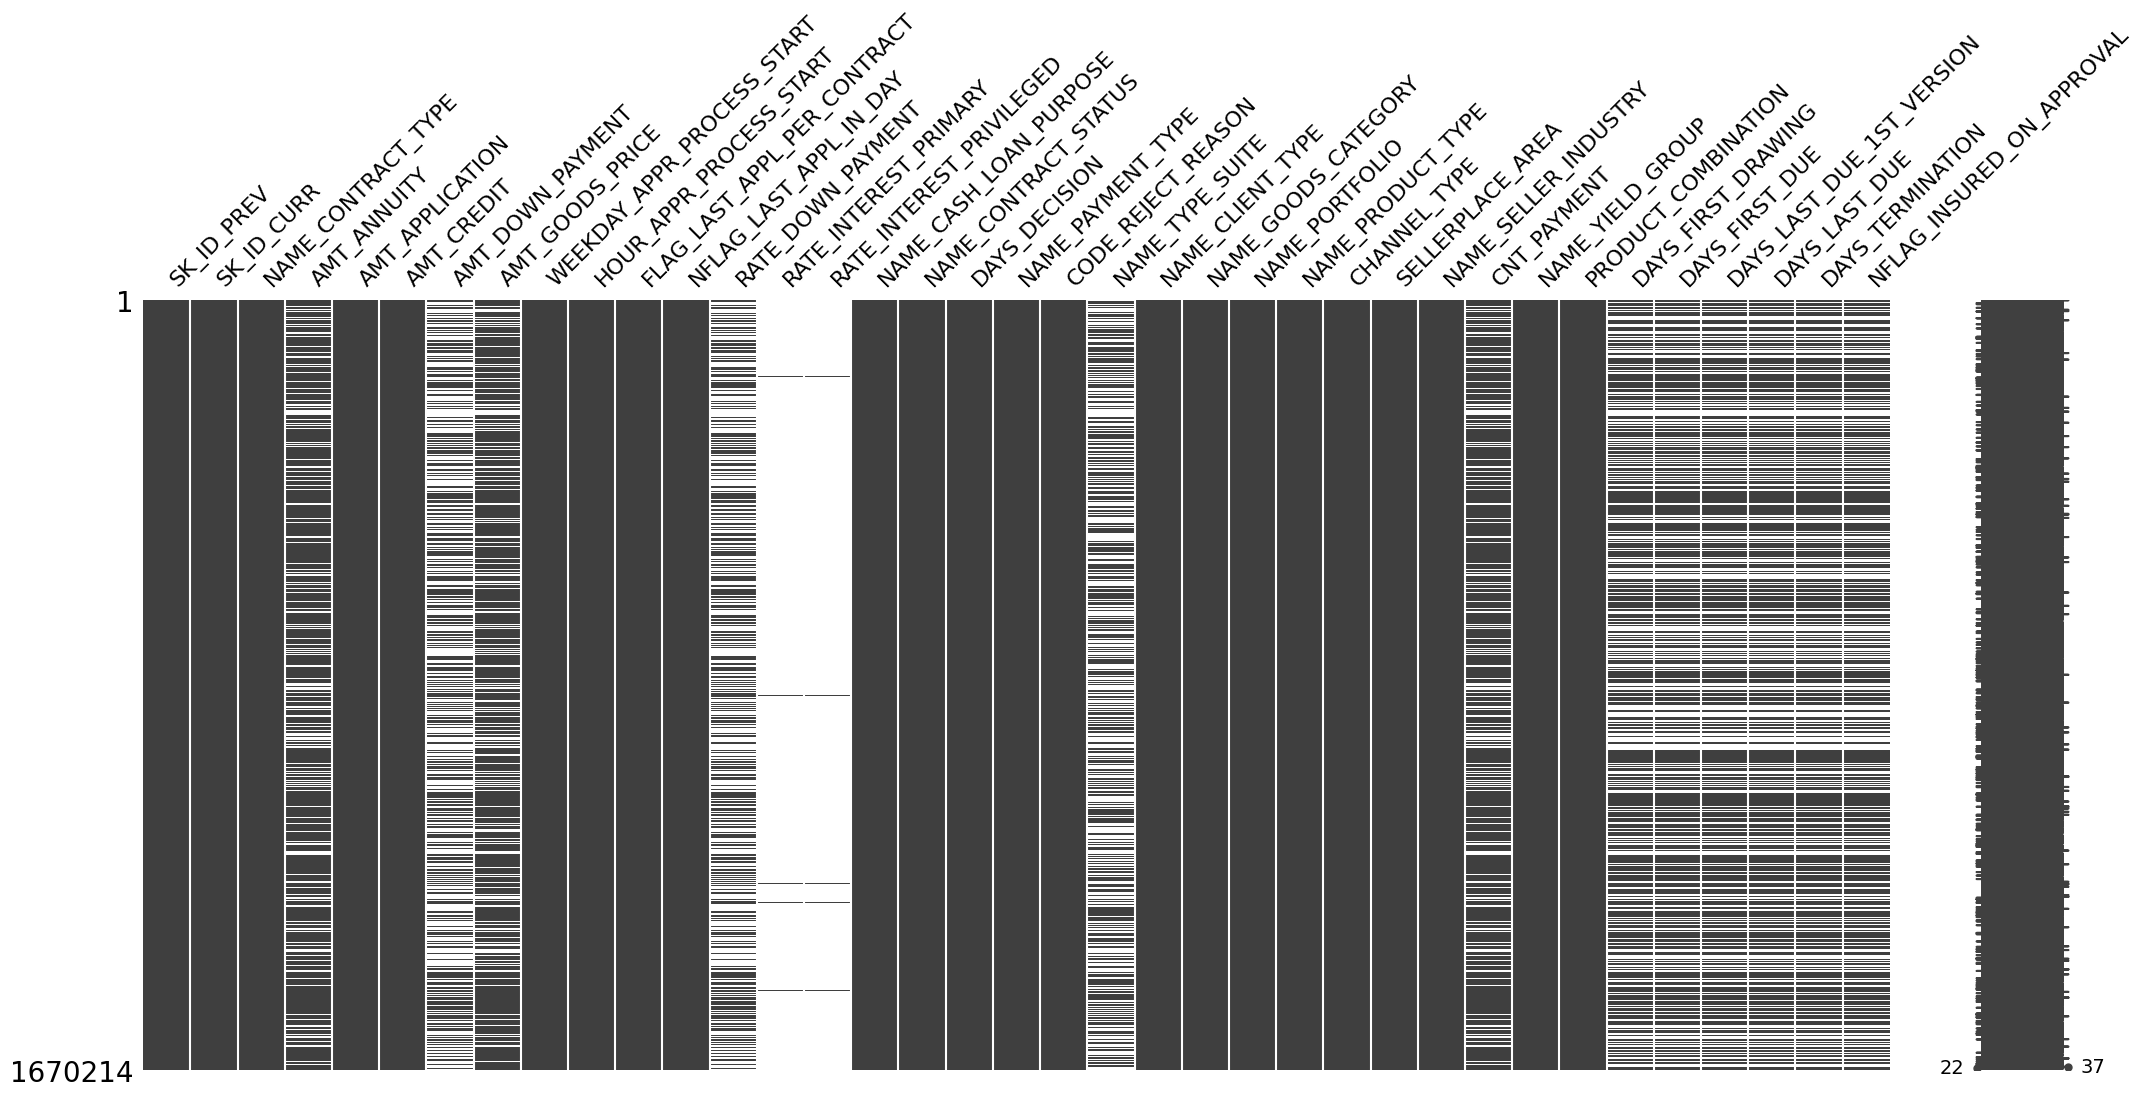

In [15]:
msno.matrix(previous_application)